<h1>View Main Dataset</h1>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import style
from matplotlib import pyplot as plt

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

style.use('dark_background')

titanic_data = pd.read_csv("train.csv")
titanic_data = titanic_data.replace(("male", "female"), (0,1))
titanic_data['Fare'] = (titanic_data['Fare']-titanic_data['Fare'].mean())/titanic_data['Fare'].mean()
titanic_data = titanic_data.dropna()
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,1.213478,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,0.648853,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,0.610426,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",1,4.0,1,1,PP 9549,-0.481434,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",1,58.0,0,0,113783,-0.175574,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",1,47.0,1,1,11751,0.631905,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",0,33.0,0,0,695,-0.844741,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",1,56.0,0,1,11767,1.582218,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,-0.068445,B42,S


<h2> Histogram plotting based on features </h2>

<AxesSubplot:title={'center':'Onboard'}, ylabel='Frequency'>

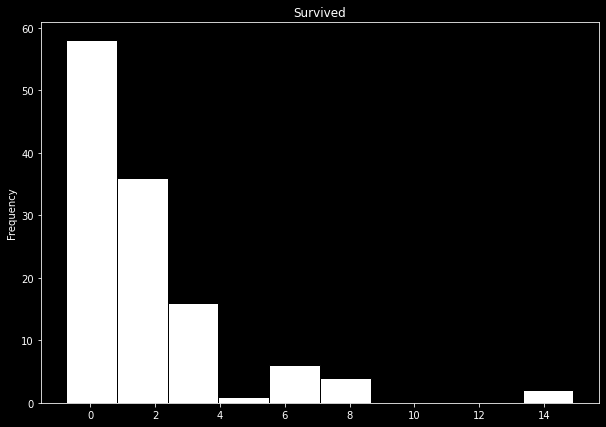

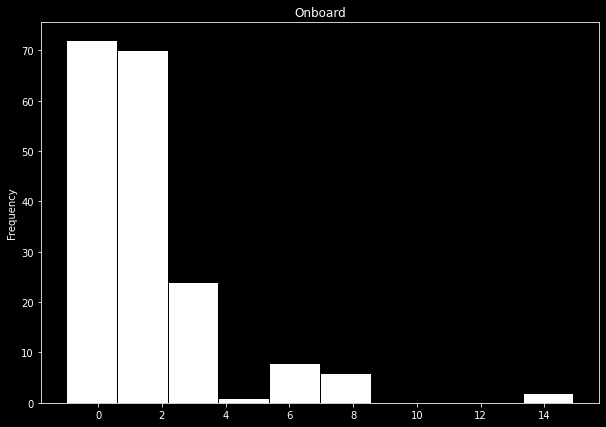

In [2]:
x = titanic_data.loc[titanic_data['Survived'] == 1]
plot1 = plt.figure(1)
plt.title("Survived")
x.Fare.plot(kind = "hist", color = 'white', edgecolor='black', figsize=(10, 7))
plot2 = plt.figure(2)
plt.title("Onboard")
titanic_data.Fare.plot(kind = "hist", color = 'white', edgecolor='black', figsize=(10, 7))


In [3]:
x = titanic_data.loc[titanic_data['Survived'] == 1]
nan_count = len(x.index)
nan_count

123

<h2> Splitting Training Data </h2>

In [4]:
f = titanic_data.columns.tolist()
f.pop(1)
f.pop(2)
f.pop(6)
f.pop(7)
f.pop(7)
print(f)
X = titanic_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
#X = titanic_data[titanic_data.columns.tolist()]
Y = titanic_data.Survived



from sklearn.model_selection import train_test_split

train_X, test_X, train_Y, test_Y = train_test_split(X, Y, random_state = 0)

['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']


<h2> Using RFE to determine feature importance </h2>

In [5]:
model = LogisticRegression()
rfe = RFE(model, 3)
fit = rfe.fit(X,Y)

print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 3
Selected Features: [ True  True False  True False False]
Feature Ranking: [1 1 4 1 2 3]


C:\Users\Rusab\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


<h2> Using Feature Importance to determine feature importance </h2>

In [39]:
from sklearn.ensemble import ExtraTreesClassifier


model = ExtraTreesClassifier(n_estimators=10)
model.fit(X, Y)
print(model.feature_importances_)

[0.03792668 0.30060772 0.31051385 0.04430042 0.04176181 0.26488953]


<h2> Hyperparameter Tuning </h2>

In [108]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

#model = RandomForestClassifier(n_estimators = 10, max_depth=None, random_state=0, oob_score = True)

mlpc = MLPClassifier()
param_grid = {
    'solver' : ['adam', 'lbfgs'],
    'hidden_layer_sizes' : [(6, 16), (5,14), (7, 20)],
    'activation' : ['tanh', 'relu', 'identity', 'logistic']
}
clf = GridSearchCV(mlpc, param_grid, n_jobs=1, cv = 5)
clf.fit(train_X, train_Y)
#model = LogisticRegression()

means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))


print('Best parameters found:\n', clf.best_params_)

C:\Users\Rusab\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Rusab\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Rusab\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Rusab\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

C:\Users\Rusab\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Rusab\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Rusab\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.

C:\Users\Rusab\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Rusab\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Rusab\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.

0.642 (+/-0.060) for {'activation': 'tanh', 'hidden_layer_sizes': (6, 16), 'solver': 'adam'}
0.665 (+/-0.104) for {'activation': 'tanh', 'hidden_layer_sizes': (6, 16), 'solver': 'lbfgs'}
0.649 (+/-0.075) for {'activation': 'tanh', 'hidden_layer_sizes': (5, 14), 'solver': 'adam'}
0.642 (+/-0.126) for {'activation': 'tanh', 'hidden_layer_sizes': (5, 14), 'solver': 'lbfgs'}
0.606 (+/-0.078) for {'activation': 'tanh', 'hidden_layer_sizes': (7, 20), 'solver': 'adam'}
0.692 (+/-0.185) for {'activation': 'tanh', 'hidden_layer_sizes': (7, 20), 'solver': 'lbfgs'}
0.627 (+/-0.217) for {'activation': 'relu', 'hidden_layer_sizes': (6, 16), 'solver': 'adam'}
0.729 (+/-0.189) for {'activation': 'relu', 'hidden_layer_sizes': (6, 16), 'solver': 'lbfgs'}
0.598 (+/-0.238) for {'activation': 'relu', 'hidden_layer_sizes': (5, 14), 'solver': 'adam'}
0.737 (+/-0.154) for {'activation': 'relu', 'hidden_layer_sizes': (5, 14), 'solver': 'lbfgs'}
0.541 (+/-0.235) for {'activation': 'relu', 'hidden_layer_sizes':

<h2> Model Training </h2>

In [111]:
model = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(6, 16), random_state=1)
model.fit(train_X, train_Y)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(6, 16), random_state=1,
              solver='lbfgs')

<h2> Prediction and Model Validation </h2>

In [112]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score

predictions = model.predict(test_X)
print(accuracy_score(test_Y, predictions))

from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(model, X, Y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

0.782608695652174
Accuracy: 0.776 (0.088)
